In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cinnamon-quality-classification/balanced_cinnamon_quality_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/cinnamon-quality-classification/balanced_cinnamon_quality_dataset.csv')

In [3]:
df.head()

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               60 non-null     object 
 1   Moisture (%)            60 non-null     float64
 2   Ash (%)                 60 non-null     float64
 3   Volatile_Oil (%)        60 non-null     float64
 4   Acid_Insoluble_Ash (%)  60 non-null     float64
 5   Chromium (mg/kg)        60 non-null     float64
 6   Coumarin (mg/kg)        60 non-null     float64
 7   Quality_Label           60 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.9+ KB


In [5]:
df.describe()

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,11.883500,6.514500,1.050833,0.450500,0.002188,0.008837
std,1.171428,0.637124,0.272585,0.161816,0.000739,0.004963
min,10.030000,5.530000,0.610000,0.200000,0.001000,0.002100
25%,11.047500,5.967500,0.777500,0.347500,0.001600,0.004400
50%,11.635000,6.395000,1.090000,0.430000,0.002050,0.008450
75%,12.657500,7.160000,1.260000,0.557500,0.002625,0.012275
max,13.930000,7.490000,1.490000,0.790000,0.003900,0.019400


In [6]:
df.drop(['Sample_ID'],axis=1,inplace=True)

In [7]:
df.sample(8)

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
43,12.74,7.16,0.63,0.69,0.0026,0.0143,Low
27,12.29,6.50,1.04,0.41,0.0025,0.0078,Medium
6,10.09,5.64,1.29,0.23,0.0017,0.0032,High
52,13.70,7.41,0.85,0.51,0.0020,0.0166,Low
4,10.23,5.82,1.28,0.26,0.0013,0.0047,High
37,12.05,6.76,1.08,0.48,0.0026,0.0052,Medium
8,10.90,5.91,1.36,0.21,0.0019,0.0027,High
15,10.28,6.07,1.48,0.35,0.0015,0.0046,High


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Moisture (%)', ylabel='Acid_Insoluble_Ash (%)'>

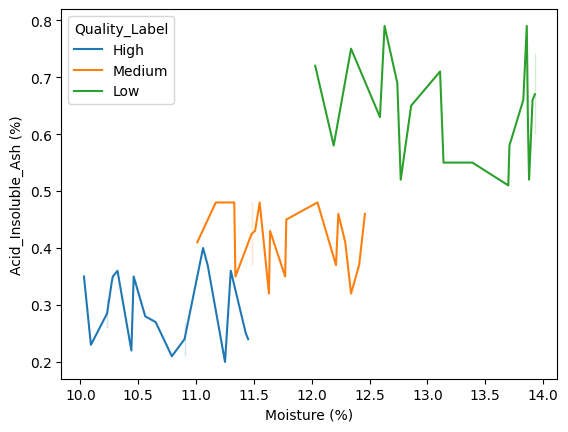

In [9]:
sns.lineplot(data=df,x=df['Moisture (%)'],y=df['Acid_Insoluble_Ash (%)'],hue='Quality_Label')

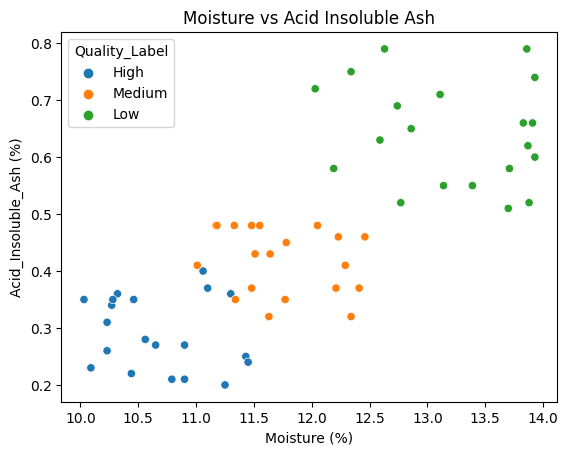

In [10]:
sns.scatterplot(data=df, x='Moisture (%)', y='Acid_Insoluble_Ash (%)', hue='Quality_Label')
plt.title("Moisture vs Acid Insoluble Ash")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

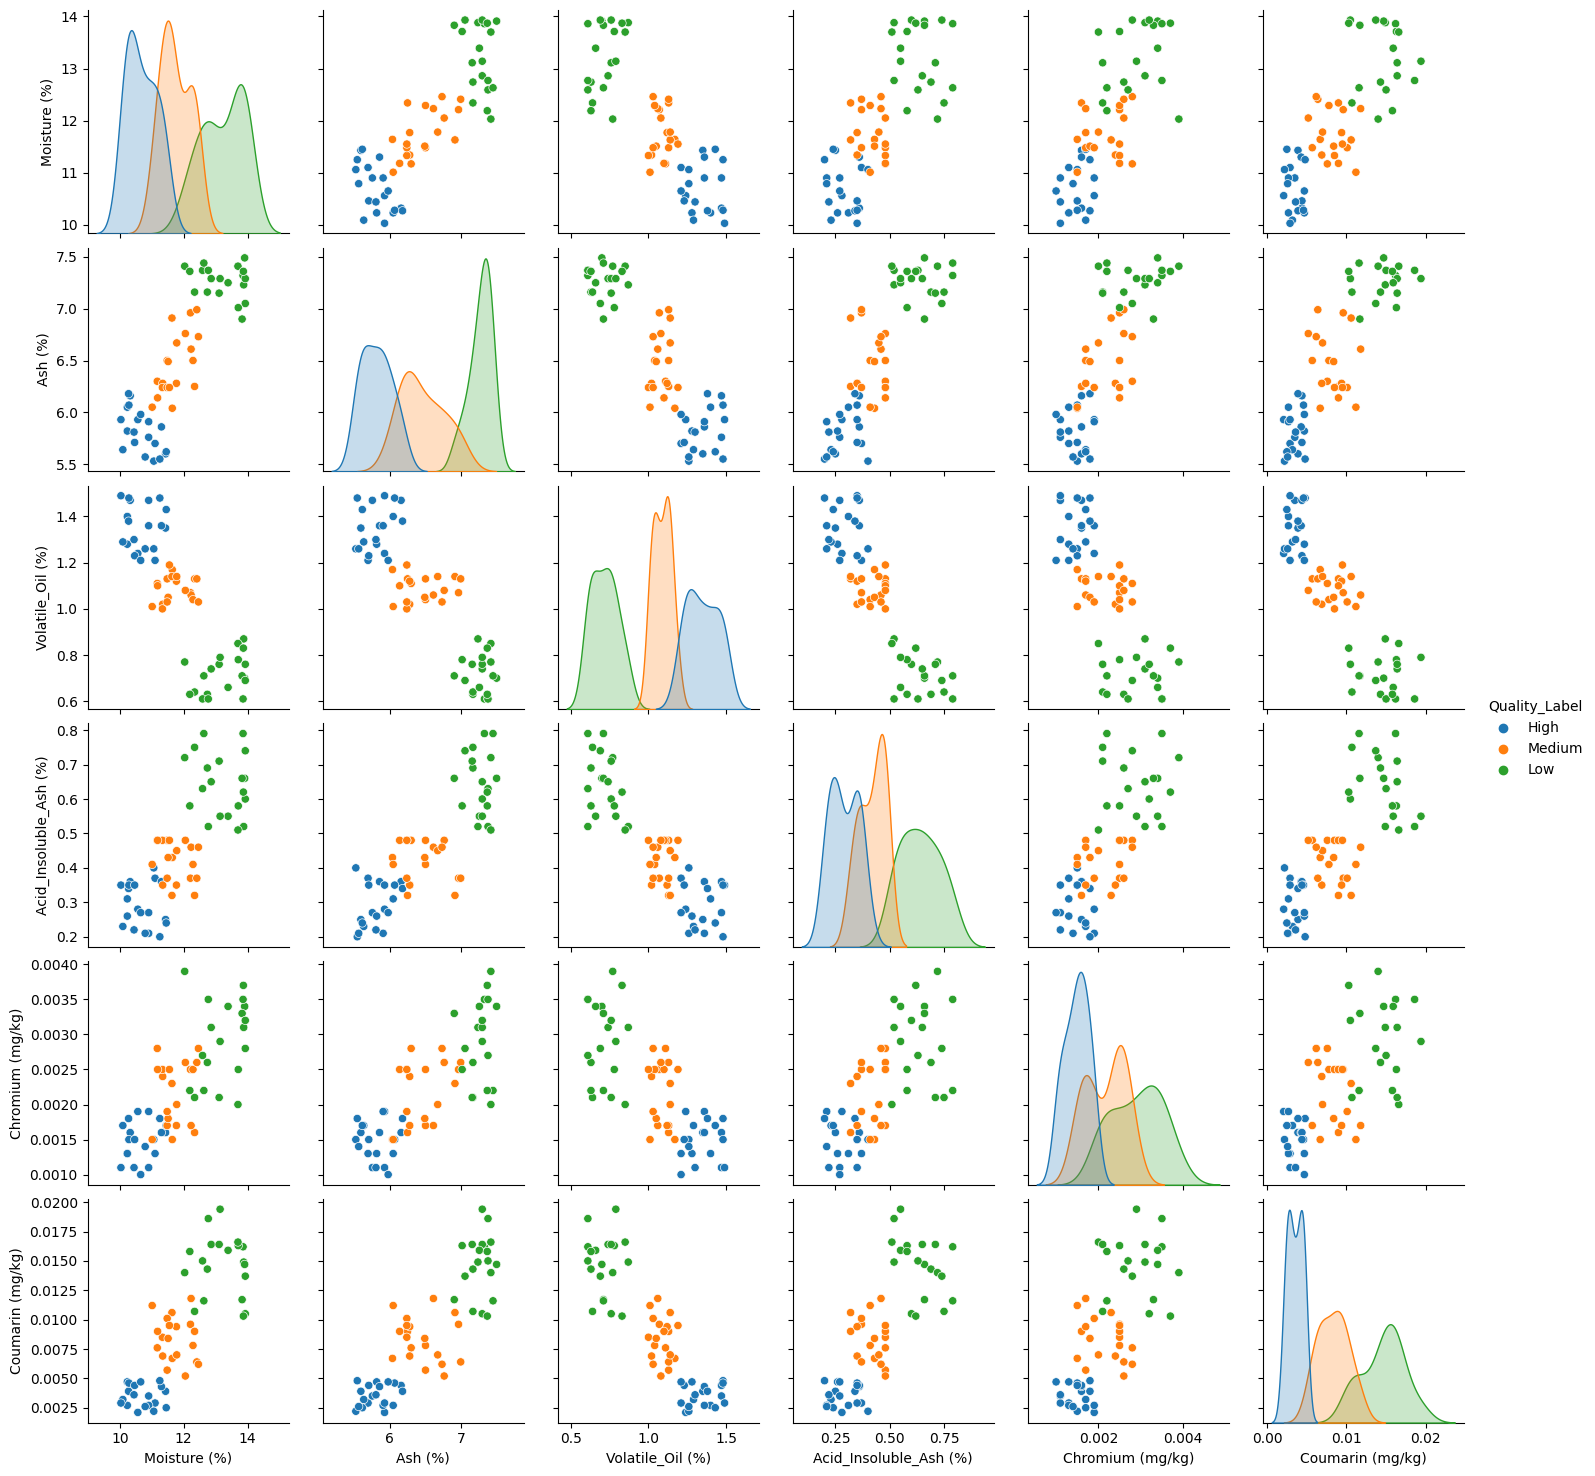

In [11]:
sns.pairplot(data=df,hue='Quality_Label')

Moisture (%)              float64
Ash (%)                   float64
Volatile_Oil (%)          float64
Acid_Insoluble_Ash (%)    float64
Chromium (mg/kg)          float64
Coumarin (mg/kg)          float64
Quality_Label              object
dtype: object
       Moisture (%)    Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
count     60.000000  60.000000         60.000000               60.000000   
mean      11.883500   6.514500          1.050833                0.450500   
std        1.171428   0.637124          0.272585                0.161816   
min       10.030000   5.530000          0.610000                0.200000   
25%       11.047500   5.967500          0.777500                0.347500   
50%       11.635000   6.395000          1.090000                0.430000   
75%       12.657500   7.160000          1.260000                0.557500   
max       13.930000   7.490000          1.490000                0.790000   

       Chromium (mg/kg)  Coumarin (mg/kg)  
count         60.00

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


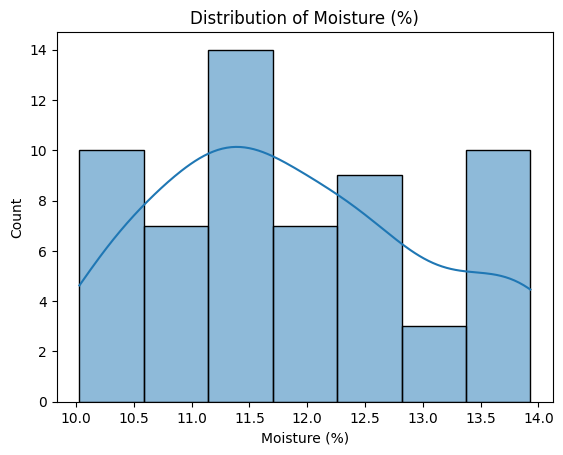

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


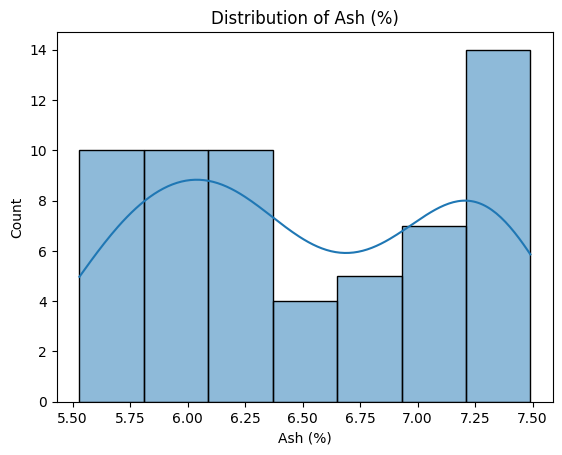

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


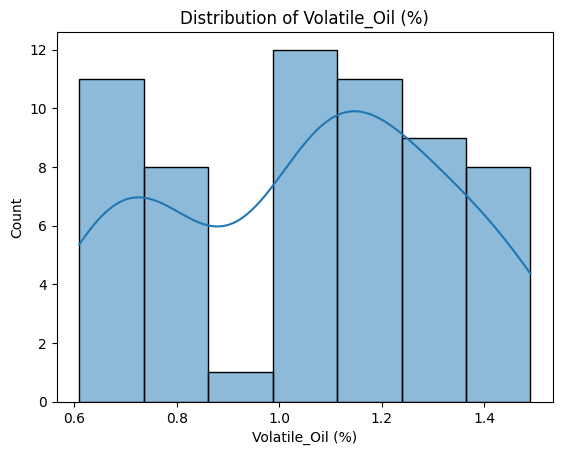

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


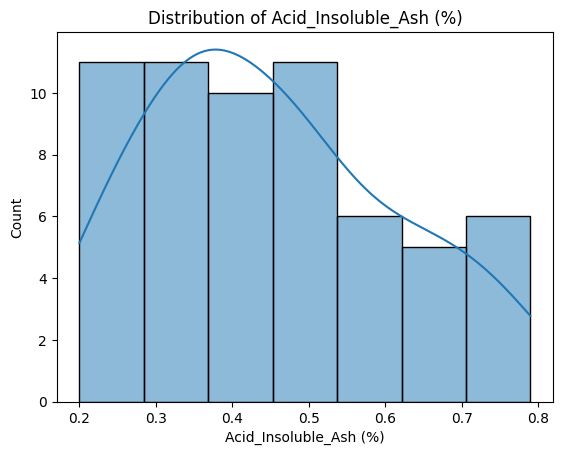

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


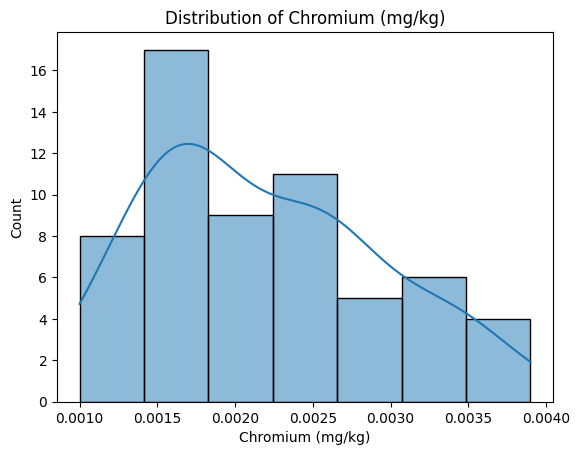

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


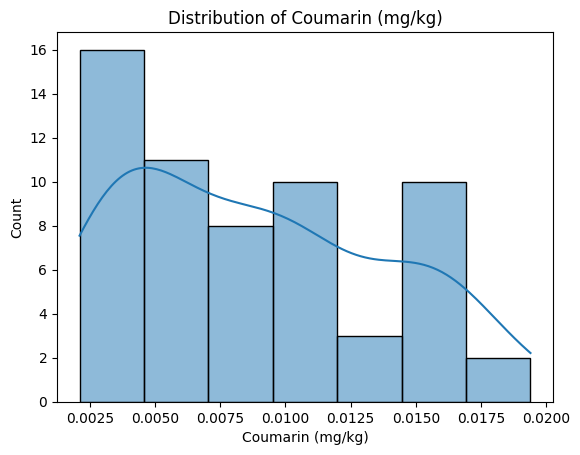

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

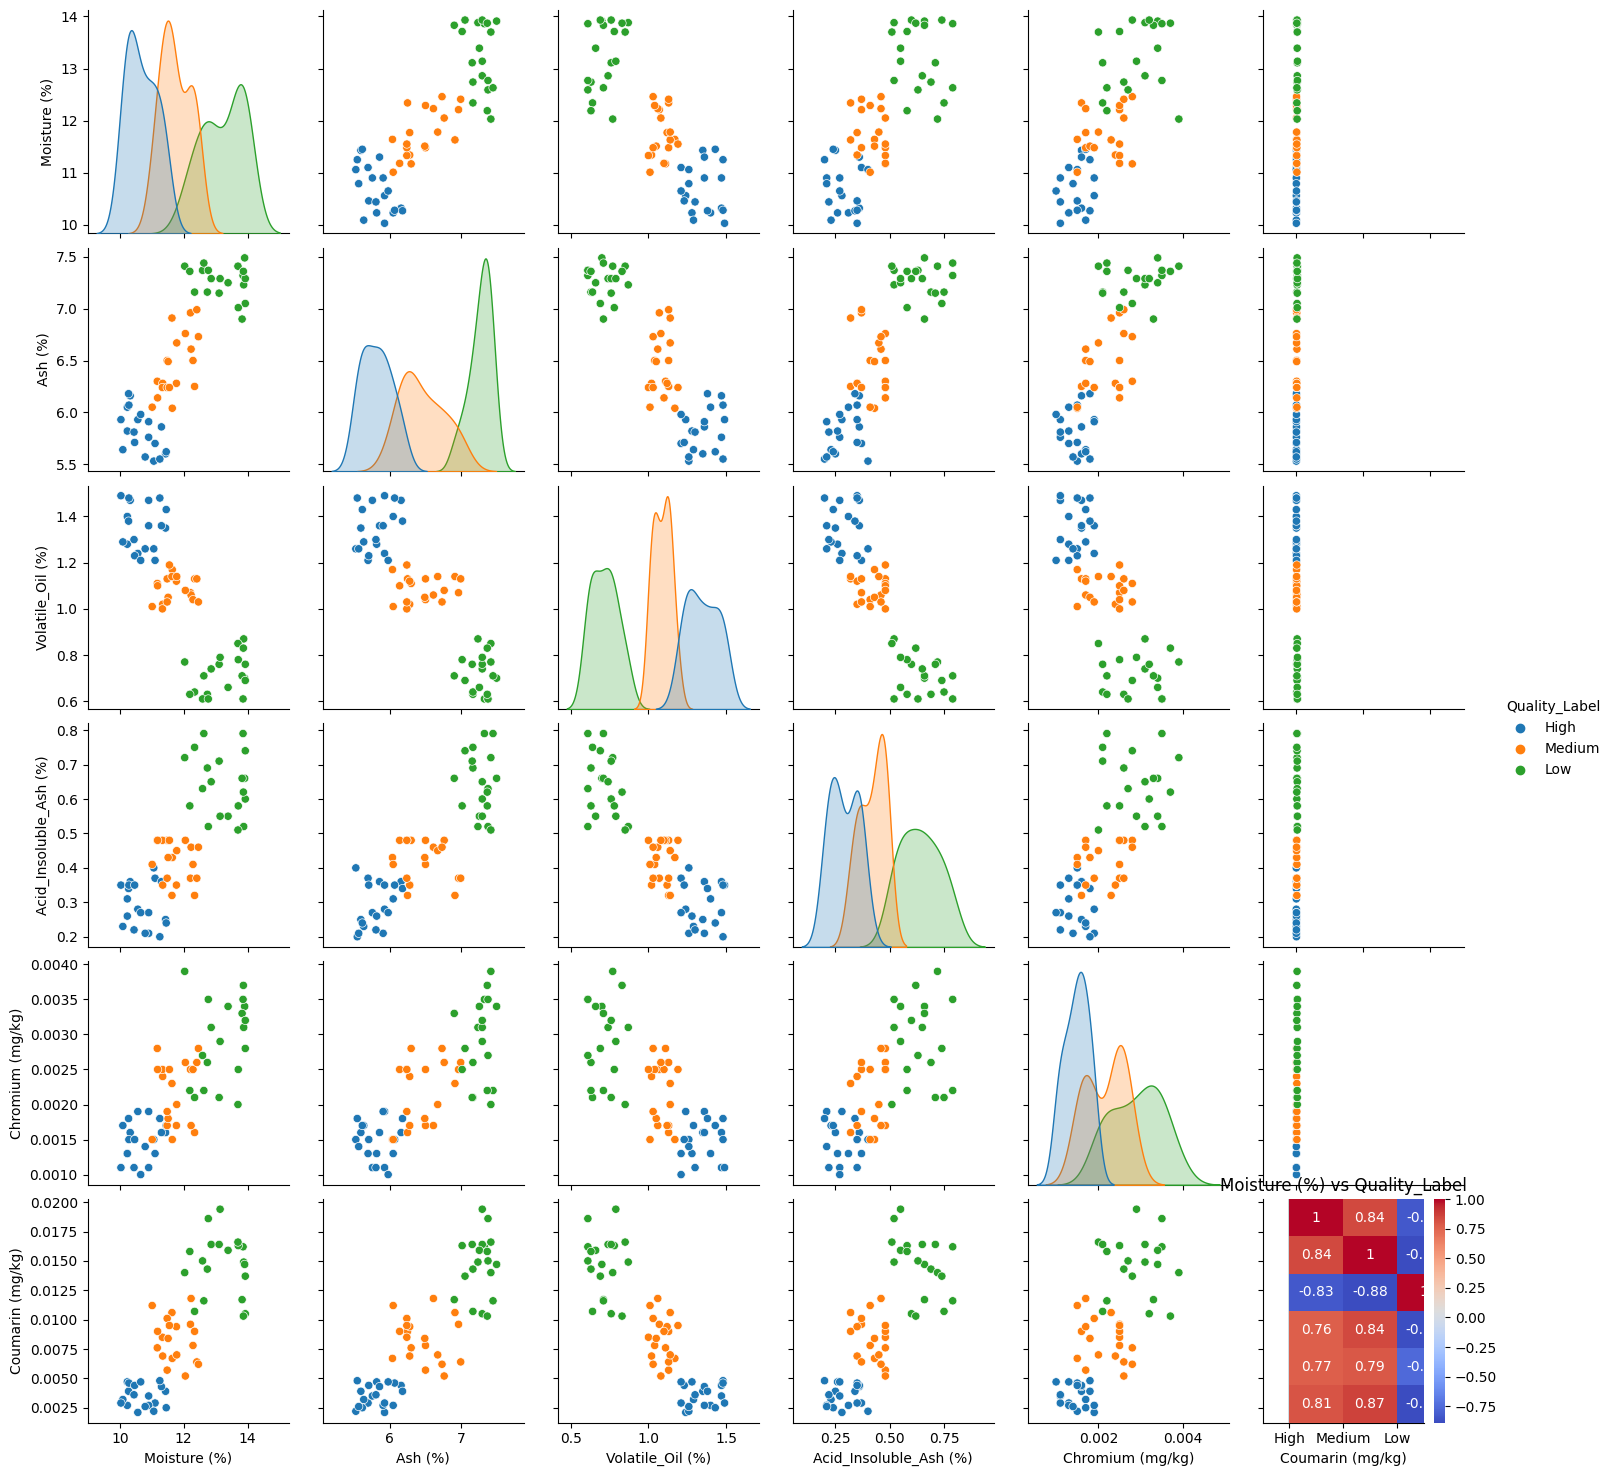

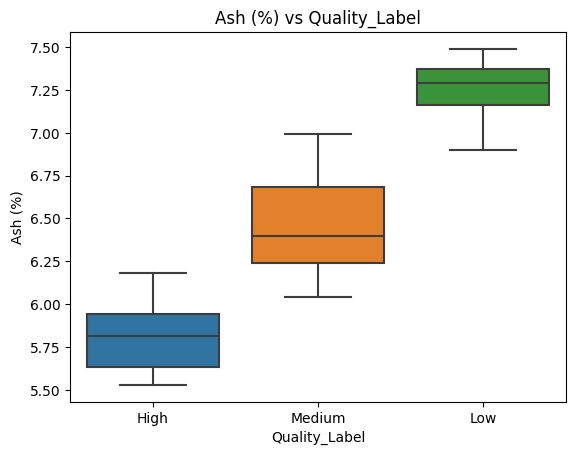

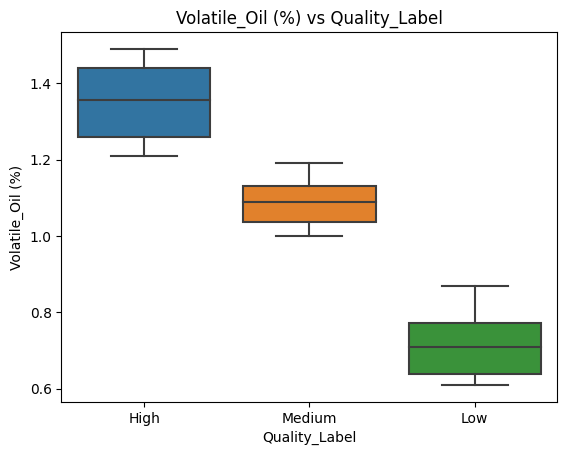

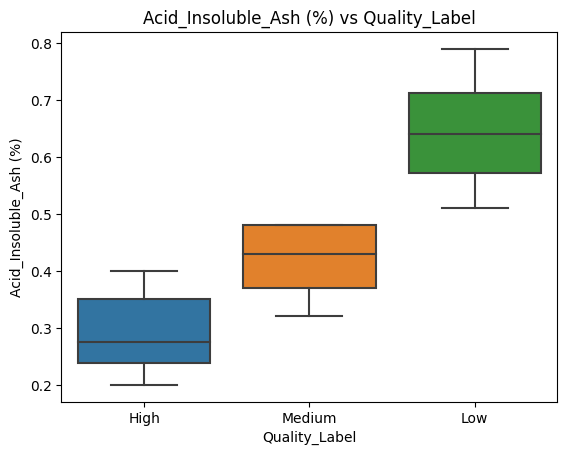

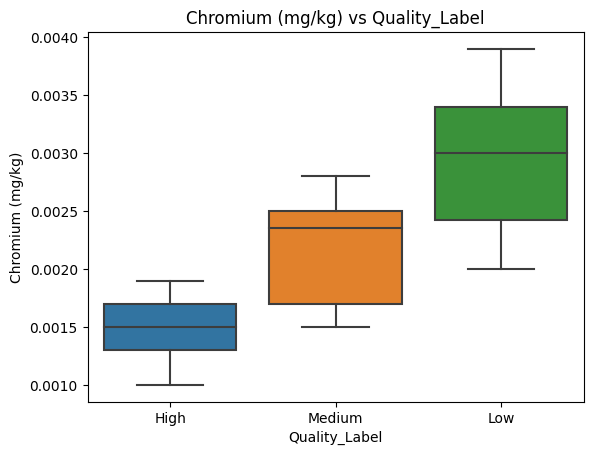

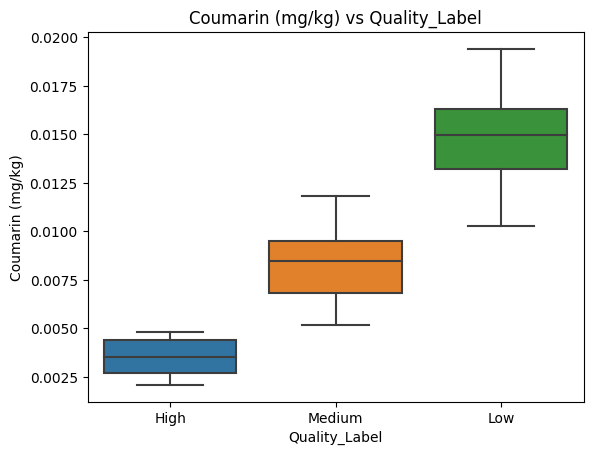

In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check datatypes
print(df.dtypes)

# Summary
print(df.describe())

# Count unique values (for deciding categorical vs numerical)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
# Univariate plots
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate numeric-numeric
sns.pairplot(df, hue='Quality_Label')

# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Numeric vs categorical
for col in num_cols:
    sns.boxplot(x='Quality_Label', y=col, data=df)
    plt.title(f'{col} vs Quality_Label')
    plt.show()


In [13]:
df.isnull().sum()

Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64

In [14]:
df.describe()

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,11.883500,6.514500,1.050833,0.450500,0.002188,0.008837
std,1.171428,0.637124,0.272585,0.161816,0.000739,0.004963
min,10.030000,5.530000,0.610000,0.200000,0.001000,0.002100
25%,11.047500,5.967500,0.777500,0.347500,0.001600,0.004400
50%,11.635000,6.395000,1.090000,0.430000,0.002050,0.008450
75%,12.657500,7.160000,1.260000,0.557500,0.002625,0.012275
max,13.930000,7.490000,1.490000,0.790000,0.003900,0.019400


In [15]:
df.skew(numeric_only=True)


Moisture (%)              0.318230
Ash (%)                   0.067859
Volatile_Oil (%)         -0.148651
Acid_Insoluble_Ash (%)    0.425548
Chromium (mg/kg)          0.460921
Coumarin (mg/kg)          0.394004
dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df.sample(5)

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
28,11.01,6.05,1.01,0.41,0.0015,0.0112,Medium
4,10.23,5.82,1.28,0.26,0.0013,0.0047,High
16,10.46,5.71,1.23,0.35,0.0015,0.0044,High
11,11.45,5.62,1.43,0.24,0.0017,0.0025,High
44,12.03,7.41,0.77,0.72,0.0039,0.0140,Low


In [18]:
df['Quality_Label']=le.fit_transform(df['Quality_Label'])

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Quality_Label'],axis=1),df['Quality_Label'],test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [23]:
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=5)

In [25]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

In [26]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [27]:
dtc_train_pred=dtc.predict(X_train)
dtc_test_pred=dtc.predict(X_test)
dtc_train_pred


array([2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1,
       0, 2, 1, 2])

In [28]:
from sklearn.metrics import accuracy_score, f1_score

print("The accuracy score for the DTC:", accuracy_score(Y_train, dtc_train_pred))
print("The f1 score for the DTC:", f1_score(Y_train, dtc_train_pred, average='weighted'))
print("the clasification report for the DTC",classification_report(Y_train,dtc_train_pred))

The accuracy score for the DTC: 1.0
The f1 score for the DTC: 1.0
the clasification report for the DTC               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [29]:
from sklearn.metrics import accuracy_score, f1_score

print("The accuracy score for the DTC:", accuracy_score(Y_test, dtc_test_pred))
print("The f1 score for the DTC:", f1_score(Y_test, dtc_test_pred, average='weighted'))
print("the clasification report for the DTC",classification_report(Y_test,dtc_test_pred))

The accuracy score for the DTC: 1.0
The f1 score for the DTC: 1.0
the clasification report for the DTC               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dtc, df.drop(['Quality_Label'],axis=1), df['Quality_Label'], cv=20)
print("Cross-validated accuracy:", np.mean(scores))


Cross-validated accuracy: 1.0


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(n_estimators=30,bootstrap=True,criterion='gini')

In [33]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [34]:
rfc_train_pred=rfc.predict(X_train)
rfc_test_pred=rfc.predict(X_test)



In [35]:
from sklearn.metrics import accuracy_score, f1_score

print("The accuracy score for the DTC:", accuracy_score(Y_test, rfc_test_pred))
print("The f1 score for the DTC:", f1_score(Y_test, rfc_test_pred, average='weighted'))
print("the clasification report for the DTC",classification_report(Y_test,rfc_test_pred))

The accuracy score for the DTC: 1.0
The f1 score for the DTC: 1.0
the clasification report for the DTC               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [36]:
from sklearn.metrics import accuracy_score, f1_score

print("The accuracy score for the DTC:", accuracy_score(Y_train, rfc_train_pred))
print("The f1 score for the DTC:", f1_score(Y_train, rfc_train_pred, average='weighted'))
print("the clasification report for the DTC",classification_report(Y_train,rfc_train_pred))

The accuracy score for the DTC: 1.0
The f1 score for the DTC: 1.0
the clasification report for the DTC               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

